In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import feather
import scipy as sp 
import time
from sklearn.manifold import spectral_embedding
from sklearn.cluster import spectral_clustering
from sklearn.cluster.spectral import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import *
import pickle
from sklearn.utils.graph import graph_laplacian
from sklearn.utils.arpack import eigsh
from sklearn.manifold.spectral_embedding_ import _set_diag
from scipy.linalg import eigvals, eigvalsh
import seaborn
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

In [4]:
M = pd.read_csv('../data/NEW/dc_rating_vor.csv')

In [6]:
M1 = M.iloc[:, 6:]

In [7]:
sM = sp.sparse.csr_matrix(M1.values, dtype=int)

In [8]:
similarity = cosine_similarity(M1)

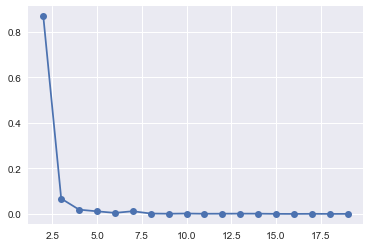

In [9]:
similarity = cosine_similarity(sM)
normed_laplacian, dd = graph_laplacian(similarity, normed=True, return_diag=True)
laplacian = _set_diag(normed_laplacian, 1, 0)


n_components = similarity.shape[0] - 1


eigenvalues, eigenvectors = eigsh(-laplacian, k=20, which="LM", sigma=1.0, maxiter=5000)
# eigenvalues = eigvalsh(-laplacian)
eigenvalues = -eigenvalues[::-1]  # Reverse and sign inversion.

max_gap = 0
gap_pre_index = 0
gaps = []
for i in range(1, eigenvalues.size):
    gap = eigenvalues[i] - eigenvalues[i - 1]
    gaps.append(gap)
    if gap > max_gap:
        max_gap = gap
        gap_pre_index = i - 1

k = gap_pre_index + 1
plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')

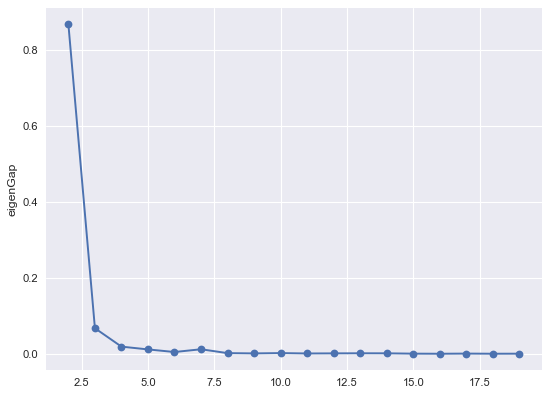

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')
plt.ylabel('eigenGap')
plt.savefig('eigengap_dc_rating.pdf', format='pdf')

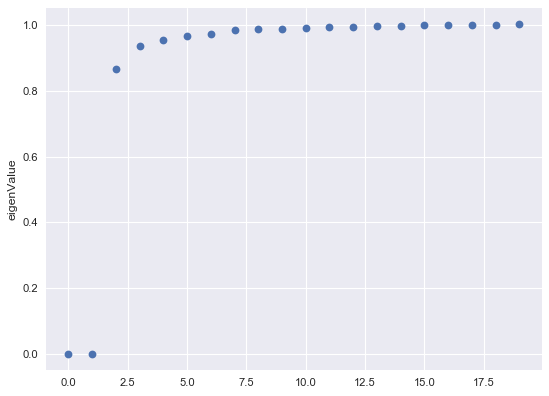

In [11]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0,20), eigenvalues[:20], 'o')
plt.ylabel('eigenValue')
plt.savefig('eigenvalues_dc_rating.pdf', format='pdf')

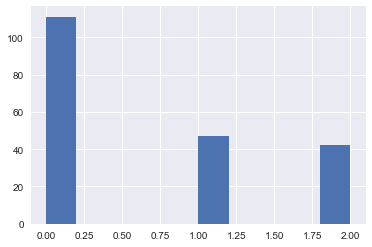

In [18]:
cl = SpectralClustering(n_clusters=3,
                        assign_labels='discretize',
                        affinity='nearest_neighbors', 
#                         eigen_solver='amg',
                        random_state=10,
                        n_jobs=-1)

label = cl.fit_predict(M1)
a = plt.hist(label)

In [19]:
M2 = M.iloc[:,:6]
M2['label'] = label
M2.to_csv('../report/dc_rating_vor.csv')